In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ova

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
     layers.Dense(64, activation='relu'),
     layers.Dense(1)]
)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
142/142 [==============================] - 1s 4ms/step - loss: 1.7383
Epoch 2/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7282
Epoch 3/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7349
Epoch 4/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7371
Epoch 5/100
142/142 [==============================] - 1s 4ms/step - loss: 1.7338
Epoch 6/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7233
Epoch 7/100
142/142 [==============================] - 0s 2ms/step - loss: 1.7165
Epoch 8/100
142/142 [==============================] - 0s 2ms/step - loss: 1.7103
Epoch 9/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7315
Epoch 10/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7272
Epoch 11/100
142/142 [==============================] - 0s 3ms/step - loss: 1.7285
Epoch 12/100
142/142 [==============================] - 0s 2ms/step - loss: 1.7032
Epoch 13/100


In [ ]:
y_pred = model.predict(X_test)

36/36 [==============================] - 0s 1ms/step


In [ ]:
from keras.src.metrics.regression_metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: [1.8779705 2.6645877 2.0492423 ... 2.1338298 1.8726007 2.371254 ]


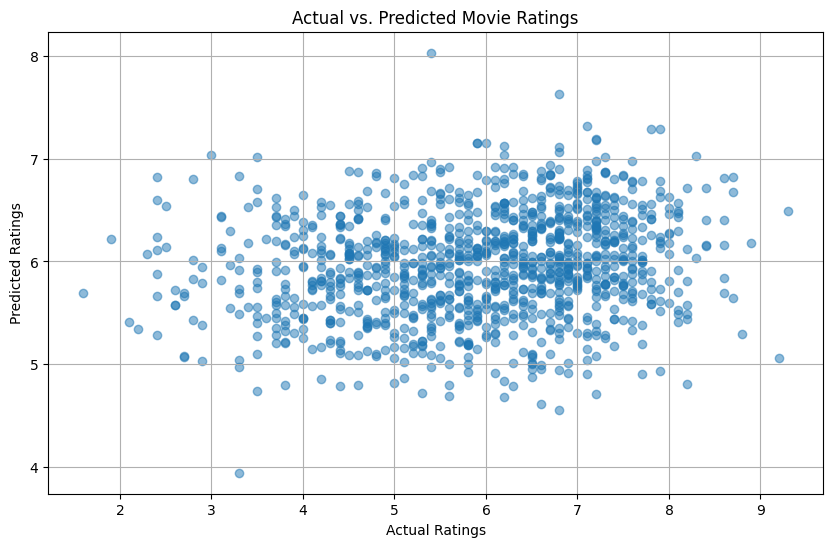

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings")
plt.grid(True)
plt.show()

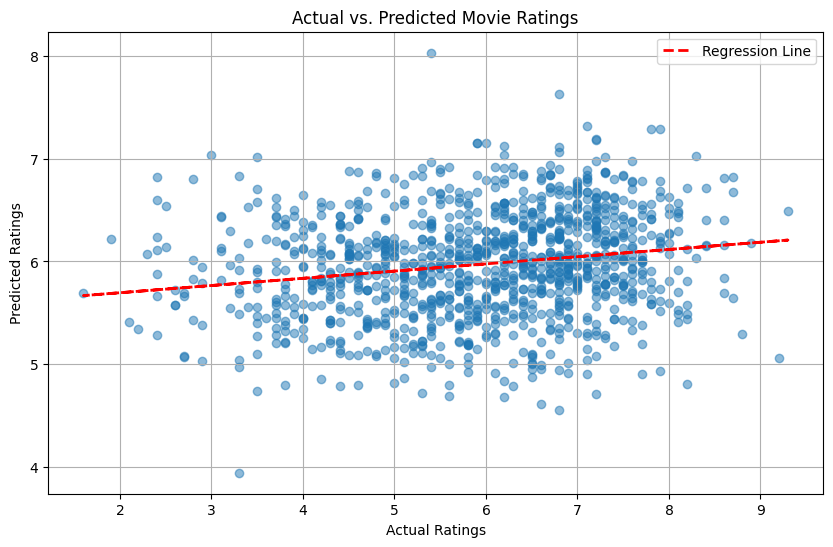

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot to visualize the actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings")

# Add a best-fit line (regression line)
regression_line = np.polyfit(y_test, y_pred, 1)  # Fit a first-degree (linear) polynomial
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, linestyle='--', label='Regression Line')

plt.grid(True)

# Show a legend to indicate the regression line
plt.legend()

plt.show()
